# Sprint23 ゲート付きリカレントニューラルネットワーク

## 【問題１】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

__LSTMのサンプルコード__


keras/imdb_lstm.py at master · keras-team/keras


__ConvLSTM2Dのサンプルコード__


keras/conv_lstm.py at master · keras-team/keras


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [1]:
!pip install tensorflow==1.15.0
!pip install keras==2.2.4

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [3]:
# 自分のマイドライブにマウントする
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# カレントディレクトリの変更
import os
os.chdir('/content/drive/My Drive/diveintocode-ml')
print(os.getcwd())

/content/drive/My Drive/diveintocode-ml


In [5]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, ConvLSTM2D
from keras.datasets import imdb
from keras import backend as K

max_features = 200
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 2
epochs = 5

print('Loading data...')
from functools import partial
import numpy as np
np.load = partial(np.load, allow_pickle=True)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
np.load = partial(np.load, allow_pickle=False)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:5000]
y_test = y_test[:5000]
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (5000, 80)
x_test shape: (5000, 80)


### SimpleRNN

In [6]:
K.clear_session()
print('Build model...')
model1 = Sequential([
    Embedding(max_features, 128),
    SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

# try using different optimizers and different optimizer configs
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model1.summary()




Build model...


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         25600     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 58,625
Trainable params: 58,625
Non-trainable params: 0
_________________________________________________________________


In [7]:
print('Train...')
model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score1, acc1 = model1.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score1)
print('Test accuracy:', acc1)

Train...



Train on 5000 samples, validate on 5000 samples
Epoch 1/5





5000/5000 [==============================] - 89s 18ms/step - loss: 0.7143 - acc: 0.4984 - val_loss: 0.7046 - val_acc: 0.5024
Epoch 2/5
5000/5000 [==============================] - 89s 18ms/step - loss: 0.7026 - acc: 0.5238 - val_loss: 0.7522 - val_acc: 0.4968
Epoch 3/5
5000/5000 [==============================] - 89s 18ms/step - loss: 0.6926 - acc: 0.5368 - val_loss: 0.6795 - val_acc: 0.5578
Epoch 4/5
5000/5000 [==============================] - 89s 18ms/step - loss: 0.6789 - acc: 0.5766 - val_loss: 0.6734 - val_acc: 0.5796
Epoch 5/5
5000/5000 [==============================] - 15s 3ms/step
Test score: 0.6944828120946884
Test accuracy: 0.5428


### GRU

In [8]:
K.clear_session()
print('Build model...')
model2 = Sequential([
    Embedding(max_features, 128),
    GRU(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

# try using different optimizers and different optimizer configs
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model2.summary()

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         25600     
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 124,417
Trainable params: 124,417
Non-trainable params: 0
_________________________________________________________________


In [9]:
print('Train...')
model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score2, acc2 = model2.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score2)
print('Test accuracy:', acc2)

Train...
Train on 5000 samples, validate on 5000 samples
Epoch 1/5
5000/5000 [==============================] - 273s 55ms/step - loss: 0.6792 - acc: 0.5564 - val_loss: 0.9007 - val_acc: 0.5286
Epoch 2/5
5000/5000 [==============================] - 267s 53ms/step - loss: 0.6252 - acc: 0.6410 - val_loss: 0.6042 - val_acc: 0.6634
Epoch 3/5
5000/5000 [==============================] - 270s 54ms/step - loss: 0.5698 - acc: 0.7040 - val_loss: 0.5854 - val_acc: 0.6946
Epoch 4/5
5000/5000 [==============================] - 269s 54ms/step - loss: 0.5404 - acc: 0.7236 - val_loss: 0.5962 - val_acc: 0.6922
Epoch 5/5
5000/5000 [==============================] - 44s 9ms/step
Test score: 0.5919506788559258
Test accuracy: 0.6932


### LSTM

In [10]:
K.clear_session()
print('Build model...')
model3 = Sequential([
    Embedding(max_features, 128),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

# try using different optimizers and different optimizer configs
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model3.summary()

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         25600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 157,313
Trainable params: 157,313
Non-trainable params: 0
_________________________________________________________________


In [11]:
print('Train...')
model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score3, acc3 = model3.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score3)
print('Test accuracy:', acc3)

Train...
Train on 5000 samples, validate on 5000 samples
Epoch 1/5
5000/5000 [==============================] - 336s 67ms/step - loss: 0.6849 - acc: 0.5500 - val_loss: 0.6768 - val_acc: 0.5596
Epoch 2/5
5000/5000 [==============================] - 331s 66ms/step - loss: 0.6413 - acc: 0.6414 - val_loss: 0.6176 - val_acc: 0.6658
Epoch 3/5
5000/5000 [==============================] - 331s 66ms/step - loss: 0.5899 - acc: 0.6926 - val_loss: 0.5916 - val_acc: 0.6830
Epoch 4/5
5000/5000 [==============================] - 331s 66ms/step - loss: 0.5600 - acc: 0.7100 - val_loss: 0.5788 - val_acc: 0.6930
Epoch 5/5
5000/5000 [==============================] - 55s 11ms/step
Test score: 0.5893544219389558
Test accuracy: 0.6874


In [12]:
import pandas as pd
df_result = pd.DataFrame(columns=["loss", "acc"], index=["SimpleRNN", "GRU", "LSTM"])
df_result.loc["SimpleRNN", :] = score1, acc1
df_result.loc["GRU", :] = score2, acc2
df_result.loc["LSTM", :] = score3, acc3
display(df_result)

,loss,acc
SimpleRNN,0.694483,0.5428
GRU,0.591951,0.6932
LSTM,0.589354,0.6874


学習にかかる時間は  
SimpleRNN < GRU < LSTM  
の順に短かった。

Accuracyは  
GRU > LSTM > SimpleRNN  
の順に良かった。

### ConvLSTM2D

Train on 950 samples, validate on 50 samples
Epoch 1/50
950/950 [==============================] - 17s 18ms/step - loss: 0.2342 - val_loss: 0.0331
Epoch 2/50
950/950 [==============================] - 15s 16ms/step - loss: 0.0205 - val_loss: 0.0079
Epoch 3/50
950/950 [==============================] - 16s 16ms/step - loss: 0.0048 - val_loss: 0.0028
Epoch 4/50
950/950 [==============================] - 16s 16ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 5/50
950/950 [==============================] - 16s 16ms/step - loss: 0.0012 - val_loss: 9.6607e-04
Epoch 6/50
950/950 [==============================] - 16s 16ms/step - loss: 8.5457e-04 - val_loss: 8.0364e-04
Epoch 7/50
950/950 [==============================] - 16s 16ms/step - loss: 7.7359e-04 - val_loss: 9.2773e-04
Epoch 8/50
950/950 [==============================] - 16s 16ms/step - loss: 6.4771e-04 - val_loss: 6.2101e-04
Epoch 9/50
950/950 [==============================] - 16s 16ms/step - loss: 5.8222e-04 - val_loss: 5.6470e-04
E

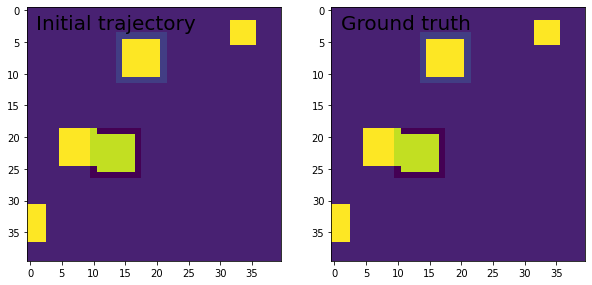

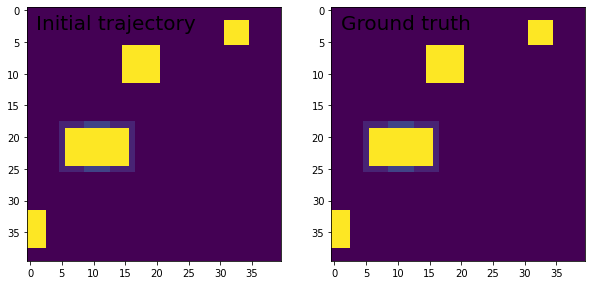

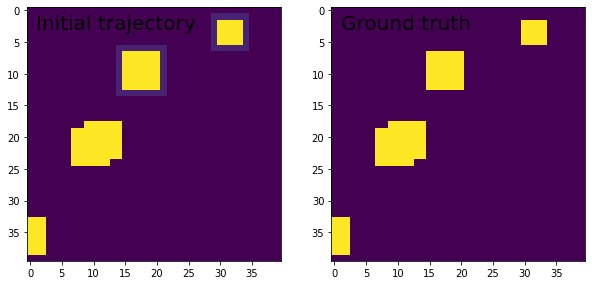

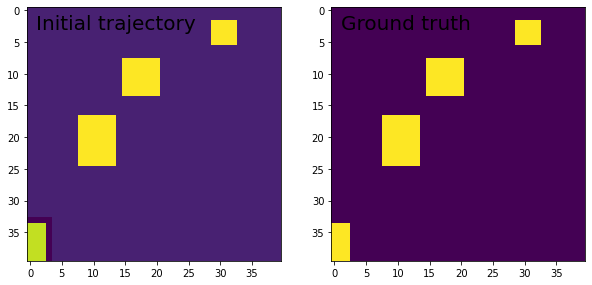

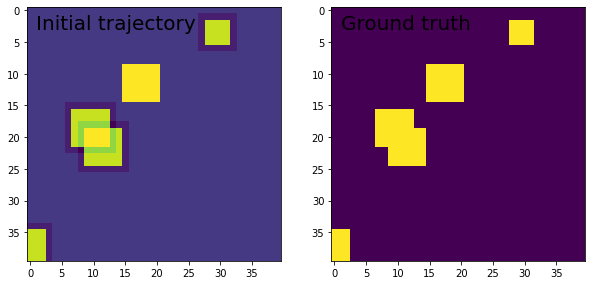

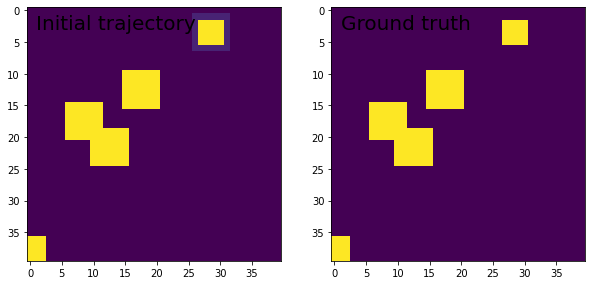

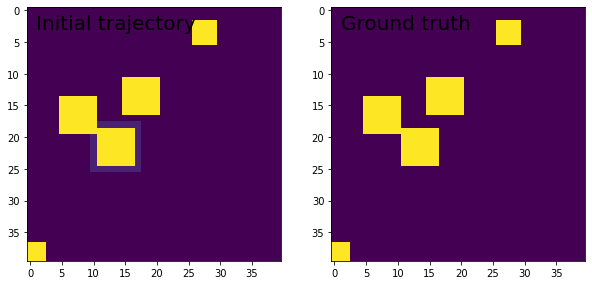

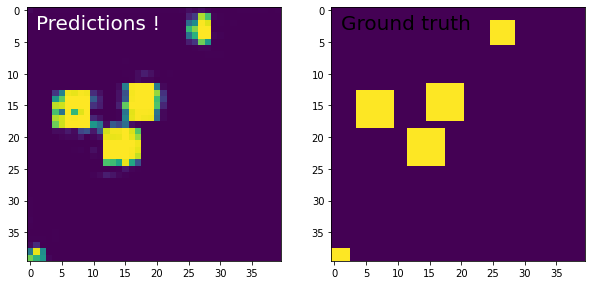

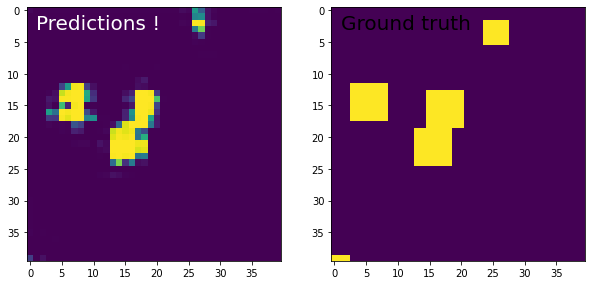

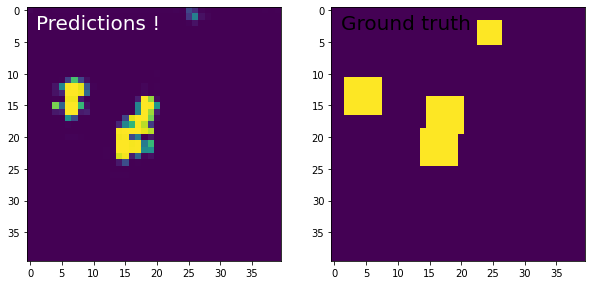

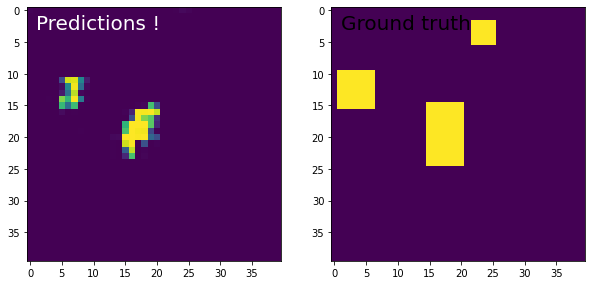

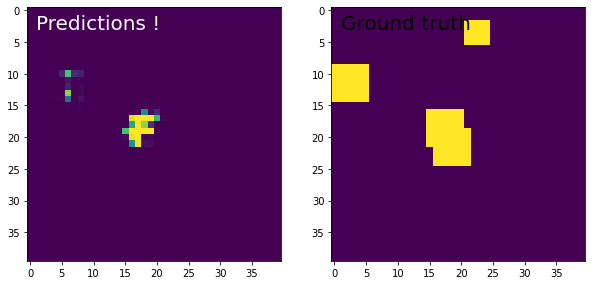

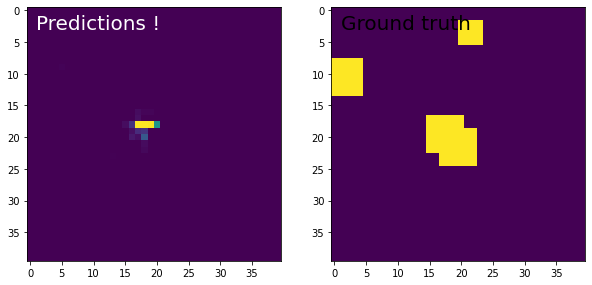

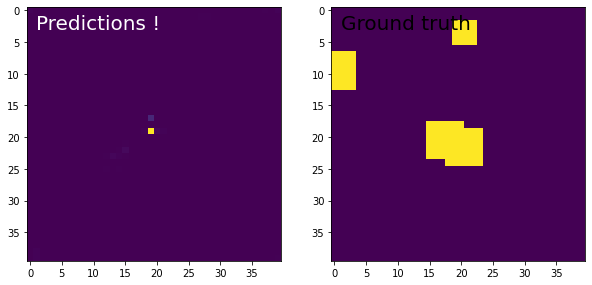

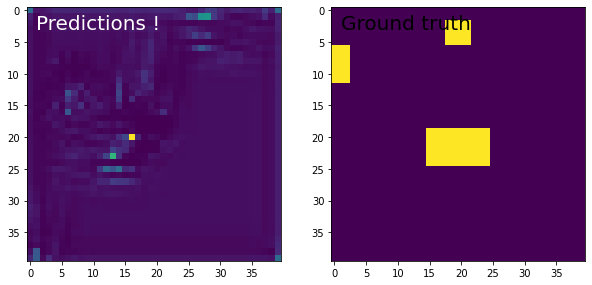

In [26]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=50, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(15):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))


## 【問題２】複数データセット間での比較
他のデータセットでも実験を行なってください。


データセット - Keras Documentation


Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

In [17]:
from keras.datasets import reuters
from sklearn.preprocessing import OneHotEncoder

np.load = partial(np.load, allow_pickle=True)
(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)
np.load = partial(np.load, allow_pickle=False)
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# One-hot Encoding
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc.fit(np.concatenate([y_train[:, np.newaxis], y_test[:, np.newaxis]], axis=0))
y_train = enc.transform(y_train[:, np.newaxis])
y_test = enc.transform(y_test[:, np.newaxis])

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Pad sequences (samples x time)
x_train shape: (8982, 100)
x_test shape: (2246, 100)
(8982, 100)
(8982, 46)
(2246, 100)
(2246, 46)


In [18]:
print(x_train[:3])
print(y_train[:3])

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     1 27595 28842     8    43    10   447     5    25   207   270
      5  3095   111    16   369   186    90    67     7    89     5    19
    102     6    19   124    15    90    67    84    22   482    26     7
     48     4    49     8   864    39   209   154     6   151     6    83
     11    15    22   155    11    15     7    48     9  4579  1005   504
      6   258     6   272    11    15    22   134    44    11    15    16
      8   197  1245    90    67    52    29   209    30    32   132     6
    109    15    17    12]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     1  3267   699  3434
   2295    56 16784  7511     9    56  3906  1073    81     5  1198    57
    366   7

### SimpleRNN

In [19]:
K.clear_session()
print('Build model...')
model1 = Sequential([
    Embedding(max_features, 128),
    SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(46, activation='softmax')
])

# try using different optimizers and different optimizer configs
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model1.summary()


Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         25600     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 64,430
Trainable params: 64,430
Non-trainable params: 0
_________________________________________________________________


In [20]:
print('Train...')
model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score1, acc1 = model1.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score1)
print('Test accuracy:', acc1)

Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/5
8982/8982 [==============================] - 174s 19ms/step - loss: 2.5313 - acc: 0.3331 - val_loss: 2.3822 - val_acc: 0.3833
Epoch 2/5
8982/8982 [==============================] - 177s 20ms/step - loss: 2.3613 - acc: 0.3653 - val_loss: 2.3333 - val_acc: 0.3905
Epoch 3/5
8982/8982 [==============================] - 176s 20ms/step - loss: 2.3762 - acc: 0.3690 - val_loss: 2.4100 - val_acc: 0.3807
Epoch 4/5
8982/8982 [==============================] - 173s 19ms/step - loss: 2.3865 - acc: 0.3695 - val_loss: 2.3186 - val_acc: 0.4443
Epoch 5/5
2246/2246 [==============================] - 8s 4ms/step
Test score: 2.318034021361322
Test accuracy: 0.43187889581478184


### GRU

In [21]:
K.clear_session()
print('Build model...')
model2 = Sequential([
    Embedding(max_features, 128),
    GRU(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(46, activation='softmax')
])

# try using different optimizers and different optimizer configs
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model2.summary()

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         25600     
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 130,222
Trainable params: 130,222
Non-trainable params: 0
_________________________________________________________________


In [22]:
print('Train...')
model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score2, acc2 = model2.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score2)
print('Test accuracy:', acc2)

Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/5
8982/8982 [==============================] - 555s 62ms/step - loss: 0.0580 - acc: 0.9848 - val_loss: 0.0524 - val_acc: 0.9869
Epoch 2/5
8982/8982 [==============================] - 557s 62ms/step - loss: 0.0486 - acc: 0.9871 - val_loss: 0.0445 - val_acc: 0.9880
Epoch 3/5
8982/8982 [==============================] - 553s 62ms/step - loss: 0.0435 - acc: 0.9877 - val_loss: 0.0495 - val_acc: 0.9867
Epoch 4/5
8982/8982 [==============================] - 553s 62ms/step - loss: 0.0451 - acc: 0.9877 - val_loss: 0.0459 - val_acc: 0.9874
Epoch 5/5
2246/2246 [==============================] - 25s 11ms/step
Test score: 0.04438906361305699
Test accuracy: 0.9874075681422294


### LSTM

In [23]:
K.clear_session()
print('Build model...')
model3 = Sequential([
    Embedding(max_features, 128),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(46, activation='softmax')
])

# try using different optimizers and different optimizer configs
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model3.summary()

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         25600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 163,118
Trainable params: 163,118
Non-trainable params: 0
_________________________________________________________________


In [24]:
print('Train...')
model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score3, acc3 = model3.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score3)
print('Test accuracy:', acc3)

Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/5
8982/8982 [==============================] - 691s 77ms/step - loss: 0.0606 - acc: 0.9837 - val_loss: 0.0557 - val_acc: 0.9857
Epoch 2/5
8982/8982 [==============================] - 690s 77ms/step - loss: 0.0537 - acc: 0.9861 - val_loss: 0.0517 - val_acc: 0.9869
Epoch 3/5
8982/8982 [==============================] - 693s 77ms/step - loss: 0.0500 - acc: 0.9867 - val_loss: 0.0504 - val_acc: 0.9869
Epoch 4/5
8982/8982 [==============================] - 694s 77ms/step - loss: 0.0456 - acc: 0.9875 - val_loss: 0.0468 - val_acc: 0.9870
Epoch 5/5
2246/2246 [==============================] - 31s 14ms/step
Test score: 0.042898276736706875
Test accuracy: 0.988317397961315


In [25]:
df_result = pd.DataFrame(columns=["loss", "acc"], index=["SimpleRNN", "GRU", "LSTM"])
df_result.loc["SimpleRNN", :] = score1, acc1
df_result.loc["GRU", :] = score2, acc2
df_result.loc["LSTM", :] = score3, acc3
display(df_result)

,loss,acc
SimpleRNN,2.31803,0.431879
GRU,0.0443891,0.987408
LSTM,0.0428983,0.988317


### 結果
学習時間  
SimpleRNN << GRU < LSTM

Accuracy  
LSTM > GRU >> SimpleRNN  

２値分類ではそうでもなかったのに、  
多値分類ではゲートの有無で精度がかなり変わった。  
理由はわからない。。。

## 【問題３】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


- RNN
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

### RNN
回帰型（再帰型？）ニューラルネットワーク  
Recuurentレイヤーに対する基底クラス。  
用意されているCellクラスや、自作したRNNcellクラスを引数に取れる。  

### SimpleRNNCell
出力が入力にフィードバックされる全結合RNN Cell。  
Denseに対して、系列方向の再帰的な処理を追加したクラス。  
unitsで出力次元数を受け取る。  

### GRUCell
ゲートのあるリカレントユニット Cell （Cho et al. 2014.）。  
完全ゲート付きユニットや最小ゲート付きユニットなど、いくつかの種類がある。  
リセットゲート・アップデートゲートにより長期記憶を可能にした。  
GRUは特定の小さなデータセットで良い性能を発揮することが知られている。  

### LSTMCell
長期・短期記憶ユニット（Hochreiter 1997.）。  
忘却ゲート、入力ゲート、出力ゲートによる長期記憶と短期記憶を可能にする。  
自然言語処理、時系列分析など様々な場面で高性能。  

### StackedRNNCell
RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー。  
効率的なstackedRNNを実装するために使われる。  
積み重ねるcellクラスを引数として受け取る。

### CuDNNGRU
NVIDIAのCuDNN（DNN用のGPU高速化ライブラリ）を利用した高速なGRU実装。  
つまり、NVIDIAのGPUでGRUを高速に計算できるよっていうクラス。  


### CuDNNLSTM
NVIDIAのCuDNNを利用して高速にLSTMを計算できるクラス。  
TensorFlowバックエンドでGPU上でのみ動作する。